In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_assets = 5
num_days = 250
mean_return = 0.0005  # Average daily return (0.05%)
std_dev_return = 0.02  # Standard deviation of daily returns (2%)

# Generate dates for the past year (excluding weekends)
dates = pd.bdate_range(end=pd.Timestamp.today(), periods=num_days)

# Generate random returns for each asset
data = {
    "Date": dates
}
for i in range(1, num_assets + 1):
    data[f"Asset{i}_Return"] = np.random.normal(mean_return, std_dev_return, num_days)

# Create DataFrame
returns_df = pd.DataFrame(data)

# Display the first few rows
print(returns_df.head())

# returns_df.to_csv("random_daily_returns.csv", index=False)

        Date  Asset1_Return  Asset2_Return  Asset3_Return  Asset4_Return  \
0 2023-12-04       0.010434      -0.024718       0.019024      -0.017965   
1 2023-12-05      -0.002265       0.018857       0.038688      -0.026534   
2 2023-12-06       0.013454       0.042943      -0.027471      -0.019017   
3 2023-12-07       0.030961       0.021149       0.011759       0.021573   
4 2023-12-08      -0.004183      -0.029887      -0.012513      -0.018488   

   Asset5_Return  
0       0.028487  
1       0.018993  
2       0.001693  
3      -0.012439  
4       0.014464  


In [30]:
returns_df.head()

,Date,Asset1_Return,Asset2_Return,Asset3_Return,Asset4_Return,Asset5_Return
0,2023-12-04,0.010434,-0.024718,0.019024,-0.017965,0.028487
1,2023-12-05,-0.002265,0.018857,0.038688,-0.026534,0.018993
2,2023-12-06,0.013454,0.042943,-0.027471,-0.019017,0.001693
3,2023-12-07,0.030961,0.021149,0.011759,0.021573,-0.012439
4,2023-12-08,-0.004183,-0.029887,-0.012513,-0.018488,0.014464


In [31]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           250 non-null    datetime64[ns]
 1   Asset1_Return  250 non-null    float64       
 2   Asset2_Return  250 non-null    float64       
 3   Asset3_Return  250 non-null    float64       
 4   Asset4_Return  250 non-null    float64       
 5   Asset5_Return  250 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.8 KB


# Using Historical VaR

## Estimating Tail Risk
Tail risk is the risk of extreme investment outcomes, most notably on the negative side of a distribution.

## Historical Drawdown 
The drawdown is the percentage loss from the highest cumulative historical period.

$$ \frac{r_{t}}{RM} - 1 $$

Historical VaR is a way to estimate a single day negative price movement. For example:

VaR(95) = -2.3\%

This means in the worst 5\% scenario, my loss will exceed -2.3\%.

In [32]:
df = returns_df.set_index('Date')

In [33]:
df.head()

,Asset1_Return,Asset2_Return,Asset3_Return,Asset4_Return,Asset5_Return
Date,,,,,
2023-12-04,0.010434,-0.024718,0.019024,-0.017965,0.028487
2023-12-05,-0.002265,0.018857,0.038688,-0.026534,0.018993
2023-12-06,0.013454,0.042943,-0.027471,-0.019017,0.001693
2023-12-07,0.030961,0.021149,0.011759,0.021573,-0.012439
2023-12-08,-0.004183,-0.029887,-0.012513,-0.018488,0.014464


## I have arbitrarily assigned each asset a portfolio weight

In [36]:
#Convert returns into index
weights = [0.1, 0.3, 0.1, 0.1, 0.4] 
index = (weights * df.values).sum(axis=1)

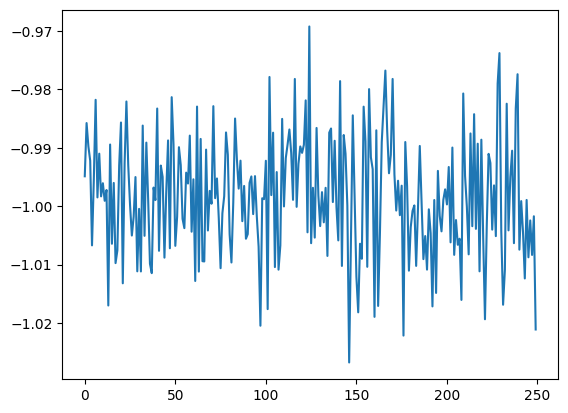

In [40]:
# Calculate the running maximum
running_max = np.maximum.accumulate(index)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (index)/running_max - 1
drawdown = pd.Series(drawdown)
# Plot the results
drawdown.plot()
plt.show()

-0.015500549619240973


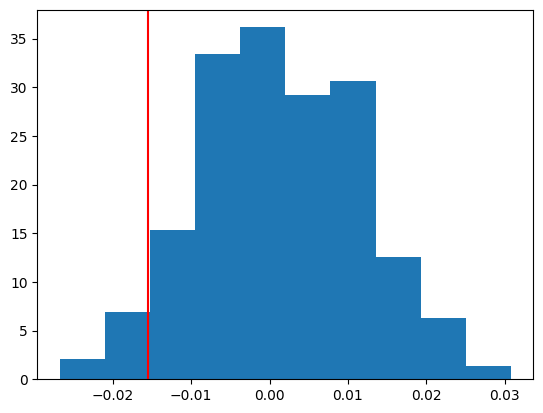

In [38]:
# Calculate historical VaR(95)
var_95 = np.percentile(index, 100 - 95)
print(var_95)

# Sort the returns for plotting
sorted_rets = pd.Series(index).sort_values()

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

## Historical VaR(95) = -1.55